# The Boston Housing Dataset Using A Neural Network Regression Model

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

## Importing the Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-11-01 22:54:55.136719: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 22:54:55.161528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

## Data Preprocessing

### Creating X and Y variables

No need to one-hot encode our data

In [4]:
# X values
X = data.drop(columns=["MEDV"])
X.head(), X.shape

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 
    PTRATIO       B  LSTAT  
 0     15.3  396.90   4.98  
 1     17.8  396.90   9.14  
 2     17.8  392.83   4.03  
 3     18.7  394.63   2.94  
 4     18.7  396.90   5.33  ,
 (506, 13))

In [5]:
# Y values
y = data["MEDV"]
y.head(), y.shape

(0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: MEDV, dtype: float64,
 (506,))

### Creating Training and Testing variables

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### Normalization

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [8]:

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ['CRIM', 'ZN','CHAS', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
)

# Fit the transform to the training data
ct.fit(X_train)    

# Transform training and test data

X_train_normal, X_test_normal = ct.transform(X_train), ct.transform(X_test)

In [9]:
pd.DataFrame(X_train_normal).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.168763,0.00,0.0,0.642963,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.0,0.274074,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.0,0.197037,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.0,0.642963,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.0,0.274074,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521


In [10]:
pd.DataFrame(X_test_normal).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000930,0.0,0.0,0.122593,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,1.0,0.210000,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,0.0,1.000000,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.0,0.372963,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.0,0.642963,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808


In [11]:
X_train_normal.shape

(404, 13)

## Building The Model

### Building

In [12]:
tf.random.set_seed(42)

#build

housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, name="input_layer"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer", activation="linear")
])

#compile
housing_model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mse", "mae"]
)

#fit
history = housing_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

### Evaluating and Testing

In [13]:
housing_model.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 11.1941 - mse: 11.1941 - mae: 2.0497


[11.194058418273926, 11.194058418273926, 2.0496795177459717]

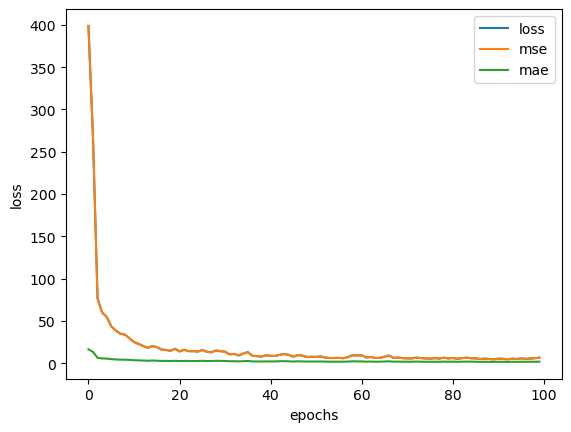

In [14]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [15]:
print("error: ", (2.2688/tf.reduce_mean(y)*100).numpy(), "%")

error:  10.06887454392366 %


**We Obtained 10% Error when predicting the housing cost**

## Saving The Model

In [17]:
housing_model.save("./boston_housing_cost_model.keras")